In [1]:
import numpy as np
from skimage import segmentation, color
from matplotlib import pyplot as plt
import cv2
import math

In [2]:
path_img = "home.jpg"
img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

In [80]:
def plot_images(list_of_images):
    n = len(list_of_images)
    if n == 1:
        plt.imshow(list_of_images[0]); plt.axis('off'); plt.show()
    else:
        r, c = 1, n
        if n > 3:
            c = 3
            r = int(math.ceil(n/3))
    
        fig = plt.figure(figsize=(17, 17))
        for i, (img,name) in enumerate(list_of_images):
            ax = fig.add_subplot(r, c, (i+1))
            ax.set_title(str(name))
            ax.axis('off')
            ax.imshow(img)


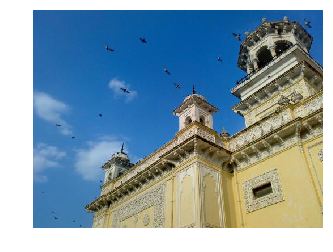

In [8]:
plot_images([img])

# Part A - K Means

In [86]:
def cluster(img, centers, k):
    # get new clusters
    new_cluster = np.empty(shape=(k, img.shape[-1]))
    for i in range(k):
        np.mean(img[centers == i], axis=0, out=new_cluster[i])
    return new_cluster
    
    
def k_means(img, k, iterations = 10):
    h, w, c = img.shape
    centers = np.random.random_sample((k, c)) * 255.0

    all_imgs = []
    for i in range(iterations):
        # Get distances between each point and each centroid
        dists = np.array([img - c for c in centers])
        sqdists = np.linalg.norm(dists, axis=-1)**2

        # Index of the closest centroid to each data point.
        clusters = np.argmin(sqdists, axis=0)
        all_imgs.append((clusters, "iteration #" + str(i+1)))
        new_centroids = cluster(img, clusters, k)
        centers = new_centroids
    
    plot_images(all_imgs)

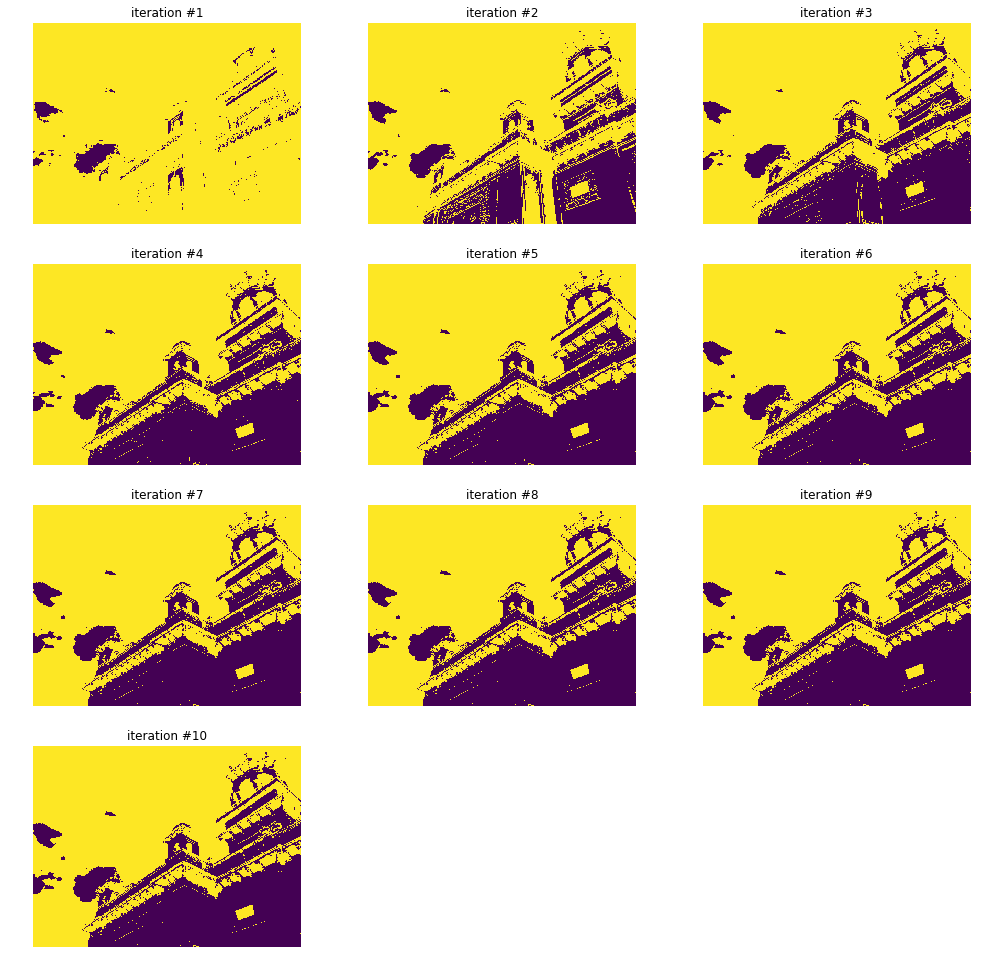

In [87]:
k_means(img, 2)

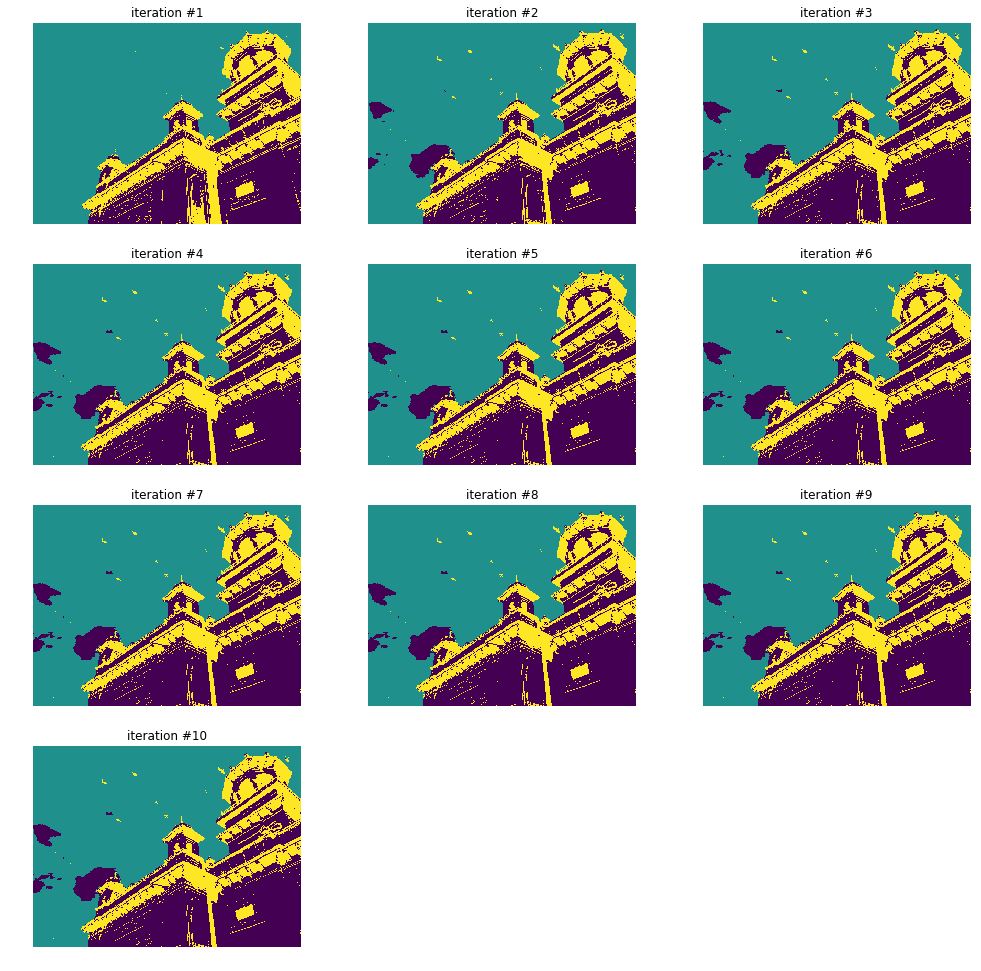

In [88]:
k_means(img, 3)

# Part B - Expectation Maximization

In [89]:
def get_gauss(img[i][j], all_mu, std):
    a = 
    return np.linalg.norm(math.e**(-0.5 * np.power((x-all_mu)/std, 2)) / (math.sqrt(2*math.pi) * std), axis=-1)

def expected_maximization(img, k, iterations = 10):
    all_mu = np.random.random((k, img.shape[-1])) * 255
    std = np.full((k, img.shape[-1]), (255.0 / k))
    probabilities = np.full((k), (1.0 / k))
    all_imgs = []

    for i in range(iterations):
        # Expextations
        expectations = np.zeroes(shape=(h, w, k))
        for i in range(h):
            for j in range(w): 
                expectations[i][j] = get_gauss(img[i][j], all_mu, std)